In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('Data/nba_logreg.csv')

In [3]:
data = raw_data.drop('Name', axis=1)
data = data.dropna(axis=0)

In [4]:
data.isnull().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [5]:
x = data.drop('TARGET_5Yrs', axis=1)
y = data['TARGET_5Yrs']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=110)

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()

In [10]:
model.fit(x_train,y_train)

SVC()

In [11]:
pred = model.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 64  96]
 [ 36 203]]


              precision    recall  f1-score   support

         0.0       0.64      0.40      0.49       160
         1.0       0.68      0.85      0.75       239

    accuracy                           0.67       399
   macro avg       0.66      0.62      0.62       399
weighted avg       0.66      0.67      0.65       399



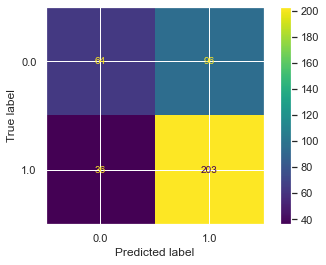

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()

### Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [16]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [17]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [18]:
grd_pred = grid.predict(x_test)

In [19]:
print(confusion_matrix(y_test,grd_pred))
print('\n')
print(classification_report(y_test,grd_pred))

[[ 64  96]
 [ 27 212]]


              precision    recall  f1-score   support

         0.0       0.70      0.40      0.51       160
         1.0       0.69      0.89      0.78       239

    accuracy                           0.69       399
   macro avg       0.70      0.64      0.64       399
weighted avg       0.69      0.69      0.67       399



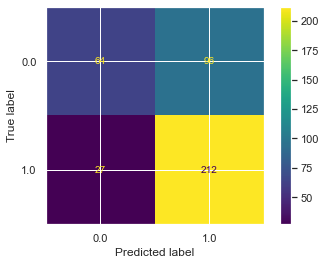

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, grd_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()

### Cross Validation

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(x)

StandardScaler()

In [24]:
x_scaled = scaler.transform(x)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=100)

In [26]:
model1 = SVC()

In [27]:
model1.fit(x_train,y_train)

SVC()

In [28]:
pre = model1.predict(x_test)

In [29]:
print(confusion_matrix(y_test,pre))
print('\n')
print(classification_report(y_test,pre))

[[ 86  63]
 [ 48 202]]


              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61       149
         1.0       0.76      0.81      0.78       250

    accuracy                           0.72       399
   macro avg       0.70      0.69      0.70       399
weighted avg       0.72      0.72      0.72       399



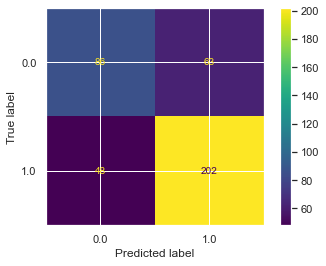

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pre, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [32]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [33]:
grd_pred = grid.predict(x_test)

In [34]:
print(confusion_matrix(y_test,grd_pred))
print('\n')
print(classification_report(y_test,grd_pred))

[[ 82  67]
 [ 48 202]]


              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59       149
         1.0       0.75      0.81      0.78       250

    accuracy                           0.71       399
   macro avg       0.69      0.68      0.68       399
weighted avg       0.71      0.71      0.71       399



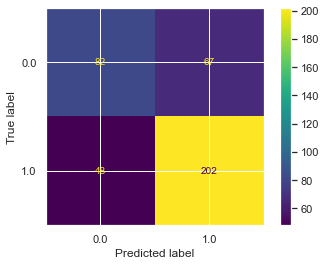

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, grd_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()